In [1]:
import haversine as hs
#緯度，經度
#台北高鐵站
loc1=(25.04733097,121.517619097881)
#苗栗高鐵站
loc2=(24.6057177,120.8254565)
#雲林高鐵站
loc3=(23.73631869,120.4165046)
#台南高鐵站
loc4=(22.9246529245525,120.285653801857)
#高雄高鐵站
loc5=(22.68785475,120.309129169351)
#花蓮豐濱
loc6=(23.58521358,121.5027313)
#台東鹿野
loc7=(22.95515334,121.1577754)

In [2]:
import numpy as np
index=[loc1,loc2,loc3,loc4,loc5,loc6,loc7]
matrix =  np.zeros((7, 7))
for i in range(7):
    for j in range(7):
        if i==j:
            matrix[i][j]=0
        else:
            matrix[i][j]=hs.haversine(index[i],index[j])
matrix            

array([[  0.        ,  85.38503382, 183.5341661 , 267.15646328,
        289.70935869, 162.58725886, 235.4935315 ],
       [ 85.38503382,   0.        , 105.19856049, 194.83004037,
        219.64532017, 132.67483626, 186.62337392],
       [183.5341661 , 105.19856049,   0.        ,  91.23672632,
        117.09927817, 111.89809666, 115.20371744],
       [267.15646328, 194.83004037,  91.23672632,   0.        ,
         26.44051313, 144.4115445 ,  89.37047588],
       [289.70935869, 219.64532017, 117.09927817,  26.44051313,
          0.        , 157.64381611,  91.91610847],
       [162.58725886, 132.67483626, 111.89809666, 144.4115445 ,
        157.64381611,   0.        ,  78.42181415],
       [235.4935315 , 186.62337392, 115.20371744,  89.37047588,
         91.91610847,  78.42181415,   0.        ]])

In [3]:
import pandas as pd
rows = ['台北高鐵站', '苗栗高鐵站', '雲林高鐵站','台南高鐵站','高雄高鐵站','花蓮豐濱','台東鹿野']
columns = ['台北高鐵站', '苗栗高鐵站', '雲林高鐵站','台南高鐵站','高雄高鐵站','花蓮豐濱','台東鹿野']
pd.DataFrame(matrix,index=rows, columns=columns)

,台北高鐵站,苗栗高鐵站,雲林高鐵站,台南高鐵站,高雄高鐵站,花蓮豐濱,台東鹿野
台北高鐵站,0.000000,85.385034,183.534166,267.156463,289.709359,162.587259,235.493531
苗栗高鐵站,85.385034,0.000000,105.198560,194.830040,219.645320,132.674836,186.623374
雲林高鐵站,183.534166,105.198560,0.000000,91.236726,117.099278,111.898097,115.203717
台南高鐵站,267.156463,194.830040,91.236726,0.000000,26.440513,144.411544,89.370476
高雄高鐵站,289.709359,219.645320,117.099278,26.440513,0.000000,157.643816,91.916108
花蓮豐濱,162.587259,132.674836,111.898097,144.411544,157.643816,0.000000,78.421814
台東鹿野,235.493531,186.623374,115.203717,89.370476,91.916108,78.421814,0.000000


In [4]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform = mds.fit_transform(matrix)
X_transform

array([[-138.36363272,  -97.46926808],
       [ -53.86272462,  -91.44048831],
       [  32.75381175,  -31.82483942],
       [  92.32664837,   37.1850265 ],
       [ 104.43794268,   60.62818871],
       [ -52.17093635,   41.06443443],
       [  14.87889091,   81.85694617]])

In [5]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
mds = MDS(dissimilarity='precomputed', random_state=0,n_components=3)
# Get the embeddings
X_transform_3d = mds.fit_transform(matrix)
X_transform_3d


array([[ 99.87338176, 127.42453387,  48.71089454],
       [ 41.07941738,  97.96961898,  -6.59884426],
       [ -8.47978835,  12.08093635, -43.92141367],
       [-63.2237293 , -61.92639905, -45.49502004],
       [-71.40314825, -87.12048613, -43.2652819 ],
       [ 13.25634208, -10.54685356,  64.14065382],
       [-11.10247532, -77.88135045,  26.42901151]])

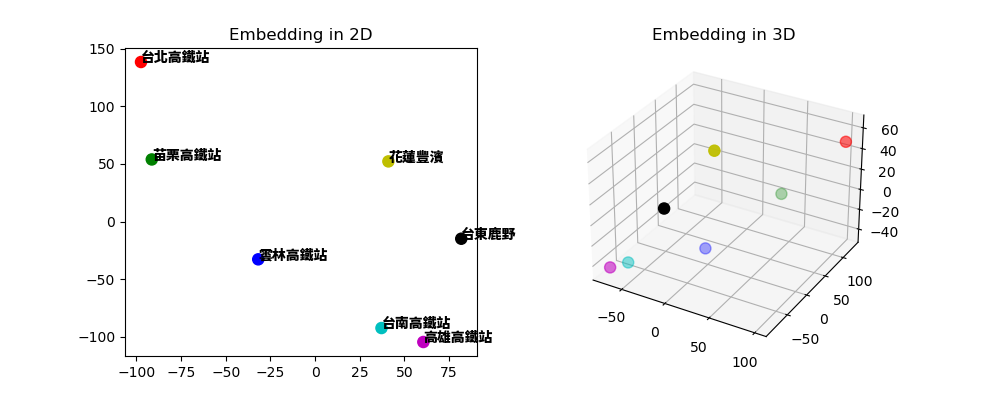

In [6]:
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
# 設定字體的檔案位置，並放到fm.FontProperties裡
fontPath = r'C:/Users/MB20705/Desktop/NotoSansTC-Black.otf'
font30 = fm.FontProperties(fname=fontPath, size=30)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
size = [64, 64, 64, 64, 64,64,64]

labels = ['台北高鐵站', '苗栗高鐵站', '雲林高鐵站','台南高鐵站','高雄高鐵站','花蓮豐濱','台東鹿野']
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121)

#2d
def rotate_coordinates(x, y, angle):
    theta = np.radians(-angle)  # 这里取负值，实现顺时针旋转  (正的就是逆時針)
    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)
    return x_rotated, y_rotated

# 将坐标点绕原点順时针旋转90度
X_transform = np.array(X_transform)
X_transform_rotated = rotate_coordinates(X_transform[:, 0], X_transform[:, 1], 90)

plt.scatter(X_transform_rotated[0], X_transform_rotated[1], s=size, c=colors)
for i, label in enumerate(labels):
    plt.text(X_transform_rotated[0][i], X_transform_rotated[1][i], label,fontproperties=font30,fontsize=10)
plt.title('Embedding in 2D')

#3d
ax = fig.add_subplot(122, projection='3d')
plt.scatter(X_transform_3d[:,0], X_transform_3d[:,1], zs=X_transform_3d[:,2], s=size, c=colors)
plt.title('Embedding in 3D')
plt.show()

In [7]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(matrix)
X_embedded

array([[ 48.4859    , 150.9491    ],
       [ 62.540524  , 110.83421   ],
       [ 41.635628  ,  10.99233   ],
       [-49.442013  , -62.625656  ],
       [-20.689907  , -94.93186   ],
       [ -0.39483336,  34.924313  ],
       [-30.55904   , -12.0782    ]], dtype=float32)

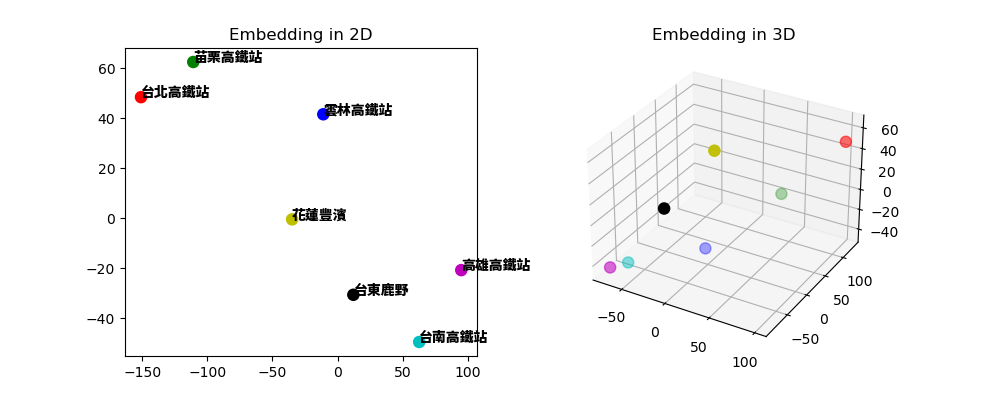

In [8]:
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
# 設定字體的檔案位置，並放到fm.FontProperties裡
fontPath = r'C:/Users/MB20705/Desktop/NotoSansTC-Black.otf'
font30 = fm.FontProperties(fname=fontPath, size=30)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
size = [64, 64, 64, 64, 64,64,64]

labels = ['台北高鐵站', '苗栗高鐵站', '雲林高鐵站','台南高鐵站','高雄高鐵站','花蓮豐濱','台東鹿野']
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121)


#2d
def rotate_coordinates(x, y, angle):
    theta = np.radians(angle)  # 这里取负值，实现顺时针旋转  (正的就是逆時針)
    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)
    return x_rotated, y_rotated

# 将坐标点绕原点順时针旋转90度
X_transform = np.array(X_embedded)
X_transform_rotated = rotate_coordinates(X_transform[:, 0], X_transform[:, 1], 90)

plt.scatter(X_transform_rotated[0], X_transform_rotated[1], s=size, c=colors)
for i, label in enumerate(labels):
    plt.text(X_transform_rotated[0][i], X_transform_rotated[1][i], label,fontproperties=font30,fontsize=10)
plt.title('Embedding in 2D')

#3d
ax = fig.add_subplot(122, projection='3d')
plt.scatter(X_transform_3d[:,0], X_transform_3d[:,1], zs=X_transform_3d[:,2], s=size, c=colors)
plt.title('Embedding in 3D')
plt.show()